In [1]:
import os
import json
import pandas as pd
import numpy as np
from urllib.parse import urlencode
import requests
import codecs
import time
import datetime

In [2]:
from DataRead import Read
from Tactic import MACD, SMA

In [3]:
import Plot

In [4]:
read=Read()
kline=read.read_kline(freq_type='1d',market='ETHUSDT')
s_date='2021-1-1'
e_date='2022-1-30'

In [7]:
len(kline)

1050

In [15]:
read=Read()
kline=read.read_kline(freq_type='1d',market='ETHUSDT')
s_date='2021-1-1'
e_date='2022-1-30'

short_flag = True

macd=MACD()
df_ema=macd.ema_tac(df=kline,short=12,long=26,median=9, enable_short=short_flag)
df_dea1=macd.dea_tac(df=kline,short=12, long=26, median=9,enable_short=short_flag,to_zero=False)
df_dea2=macd.dea_tac(df=kline,short=12, long=26, median=9,enable_short=short_flag,to_zero=True)
df_dea=macd.dea_tac(df=kline,short=12, long=26, median=9,enable_short=short_flag)

sma=SMA()
df_sma=sma.sma_tac(df=kline, sma1=12, sma2=26,enable_short=short_flag)

df_sma_test=df_sma[s_date:e_date].copy()
df_sma_test=sma.complete_returns(df_sma_test)

df_ema_test=df_ema[s_date:e_date].copy()
df_ema_test=macd.complete_returns(df_ema_test)

df_dea_test1=df_dea1[s_date:e_date].copy()
df_dea_test1=macd.complete_returns(df_dea_test1)

df_dea_test2=df_dea2[s_date:e_date].copy()
df_dea_test2=macd.complete_returns(df_dea_test2)

df_dea_test=df_dea[s_date:e_date].copy()
df_dea_test=macd.complete_returns(df_dea_test)



ema={
    'tac_name':'ema',
    'price_return':macd.base_return(df_ema_test),
    'strategy_return':macd.tac_return(df_ema_test),
    'price_drawdown':macd.max_price_drop(df_ema_test),
    'strategy_drawdown':macd.max_tac_drawdown(df_ema_test),
    
}

dea1={
    'tac_name':'dea1',
    'price_return':macd.base_return(df_dea_test1),
    'strategy_return':macd.tac_return(df_dea_test1),
    'price_drawdown':macd.max_price_drop(df_dea_test1),
    'strategy_drawdown':macd.max_tac_drawdown(df_dea_test1),
    
}

dea2={
    'tac_name':'dea2',
    'price_return':macd.base_return(df_dea_test2),
    'strategy_return':macd.tac_return(df_dea_test2),
    'price_drawdown':macd.max_price_drop(df_dea_test2),
    'strategy_drawdown':macd.max_tac_drawdown(df_dea_test2),
    
}

dea={
    'tac_name':'dea',
    'price_return':macd.base_return(df_dea_test),
    'strategy_return':macd.tac_return(df_dea_test),
    'price_drawdown':macd.max_price_drop(df_dea_test),
    'strategy_drawdown':macd.max_tac_drawdown(df_dea_test),
    
}

sma={
    'tac_name':'sma',
    'price_return':sma.base_return(df_sma_test),
    'strategy_return':sma.tac_return(df_sma_test),
    'price_drawdown':sma.max_price_drop(df_sma_test),
    'strategy_drawdown':sma.max_tac_drawdown(df_sma_test),
    
}

res=pd.DataFrame([ema,dea,sma])

In [16]:
print(res)

  tac_name  price_return  strategy_return  price_drawdown  strategy_drawdown
0      ema      2.569275         0.975891             0.0             0.0000
1      dea      2.569275         1.810046             0.0             0.0000
2      sma      2.569275         0.949124             0.0            -0.2476


## 画图

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

%matplotlib inline

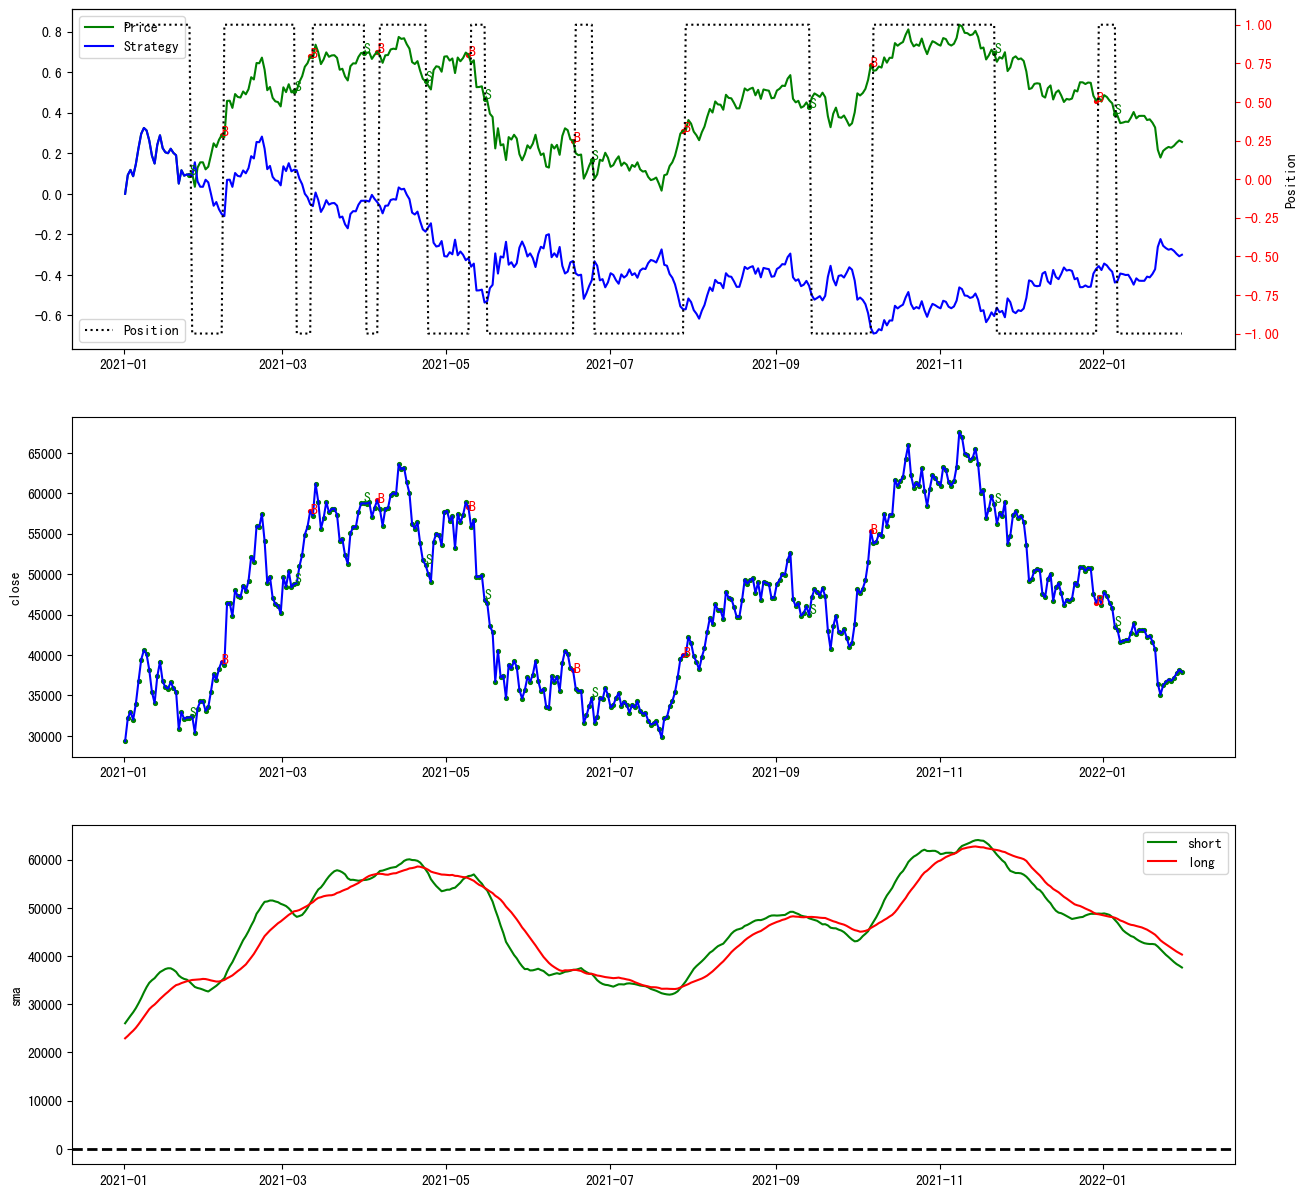

In [14]:
Plot.plot_sma_return(df_sma_test)

In [39]:
df_dea_test.tail()

,open_time,open,high,low,close,turnover_volume,close_time,turnover_value,deal_num,bid_volume,...,dif,dea,macd,Position,pos_chg,Direction,Returns,Strategy,Cum_Strategy_Returns,Cum_Price_Returns
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-28 08:00:00,1643328000000,2424.02,2558.98,2357.88,2544.99,485149.80650,1643414399999,1.183543e+09,884305,243890.02150,...,-311.570359,-286.720074,-49.700569,-1.0,0.0,,0.048605,-0.048605,0.994487,1.189587
2022-01-29 08:00:00,1643414400000,2544.99,2636.66,2520.01,2601.43,376666.82460,1643500799999,9.667252e+08,656017,196742.39660,...,-294.545255,-288.285111,-12.520289,-1.0,0.0,,0.021935,-0.021935,0.972552,1.211521
2022-01-30 08:00:00,1643500800000,2601.43,2640.00,2542.50,2601.68,290770.08590,1643587199999,7.550398e+08,564478,147074.18890,...,-277.829914,-286.194071,16.728314,-1.0,0.0,B,0.000096,-0.000096,0.972456,1.211618
2022-01-31 08:00:00,1643587200000,2601.67,2706.77,2476.07,2686.94,444584.85100,1643673599999,1.154489e+09,814997,226655.55320,...,-254.766329,-279.908523,50.284387,0.0,1.0,,0.032246,0.000000,0.972456,1.243863
2022-02-01 08:00:00,1643673600000,2686.94,2813.00,2673.52,2787.23,390034.27362,1643759999999,1.075341e+09,790343,199367.04362,...,-225.792907,-269.085400,86.584985,0.0,0.0,,0.036645,0.000000,0.972456,1.280508


In [40]:
np.exp(1.2805)-1

2.5984384950869712

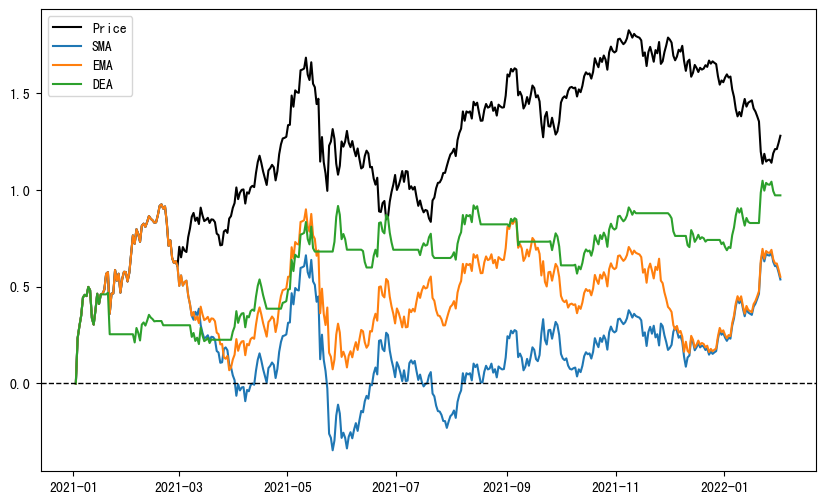

In [37]:
fig=plt.figure(figsize=(10,6))
ax1 = plt.subplot(111)

# ax1.plot(df_sma_test.index,df_sma_test['Cum_Price_Returns'],color='r',label='Price')
# ax1.plot(df_sma_test.index,df_sma_test['Cum_Strategy_Returns'],color='g',label='SMA')
# ax1.plot(df_sma_test.index,df_ema_test['Cum_Strategy_Returns'],color='b',label='EMA')
# ax1.plot(df_sma_test.index,df_dea_test['Cum_Strategy_Returns'],color='y',label='DEA')

ax1.plot(df_sma_test.index,df_sma_test['Cum_Price_Returns'],c='k',label='Price')
ax1.plot(df_sma_test.index,df_sma_test['Cum_Strategy_Returns'],label='SMA')
ax1.plot(df_sma_test.index,df_ema_test['Cum_Strategy_Returns'],label='EMA')
ax1.plot(df_sma_test.index,df_dea_test['Cum_Strategy_Returns'],label='DEA')

plt.axhline(y=0.0,c='black',lw=1,ls='--')
plt.legend()
plt.show()